In [1]:
import numpy as np
import pandas as pd
import time

import scipy
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
train = pd.read_csv("train_data.csv")
#test = pd.read_csv("test_data_full.csv")
#predictions = pd.read_csv("test_data_check_template.csv")

C:\Users\andrk\AppData\Local\Temp\ipykernel_7372\402213576.py:1: DtypeWarning: Columns (14,32) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("train_data.csv")


In [3]:
pd.set_option('display.max_columns', None)
train.head(10)

,Unnamed: 0,Id,OpportunityId,CreatedById,CreatedDate,CreatedDateForInsert,StageName,Amount,Probability,PrevOpportunityStageUpdate,ValidThroughDate,SystemModstamp,IsDeleted,PrevAmount,PrevCloseDate,AccountId,RecordTypeId,StageSortOrder,Type,LeadSource,CampaignId,OwnerId,Territory2Id,FiscalYear,FiscalQuarter,ContactId,PartnerAccountId,Number_of_Seats__c,SCC_Interest__c,Company_s_CRM_Type__c,Deal_type__c,Needs__c,Type_of_Users__c,TAM__c,Secondary_CSM__c,Source_Type__c,Original_Lead_Source__c,Original_Lead_Source_Details__c
0,0,0081300002NRVGwAAP,00613000019fCVIAA2,00530000004M1PmAAK,6/30/2014 15:21,6/30/2014 15:21,0% probability Closed Lost,0.0,100,6/30/2014 15:21,9/26/2014 17:12,9/26/2014 17:12,0,NaN,NaN,0011300001dJpsyAAC,01230000000EhyS,11.0,Licenses,Inbound,000000000000000AAA,00530000000wmgpAAA,000000000000000AAA,2013,4,000000000000000AAA,000000000000000AAA,0.0,0,NaN,NaN,NaN,NaN,0051B000009NLbeQAG,0051B00000CsqZ4QAJ,NaN,Inbound,Marketplace - SFDC AppExchange
1,1,0081300002OmHzxAAF,0061300001AAxCTAA1,00530000004M1PmAAK,8/27/2014 20:42,8/27/2014 20:42,100% Won / PO / Invoiced,14250.0,100,8/27/2014 20:42,8/27/2014 20:43,8/27/2014 20:43,0,NaN,NaN,0011300001aCWWLAA4,01230000000EhyS,20.0,Licenses,Inbound,000000000000000AAA,0051300000BAQBnAAP,000000000000000AAA,2014,3,000000000000000AAA,000000000000000AAA,12.0,0,Salesforce,NaN,NaN,NaN,0051300000C41JZAAZ,0051B000009MC2dQAG,NaN,Inbound,Marketplace - SFDC AppExchange
2,2,0081300002OmI2DAAV,0061300001AAxCTAA1,00530000004M1PmAAK,8/27/2014 20:42,8/27/2014 20:43,100% Won / PO / Invoiced,14250.0,30,8/27/2014 20:42,9/26/2014 17:12,9/26/2014 17:12,0,NaN,NaN,0011300001aCWWLAA4,01230000000EhyS,20.0,Licenses,Inbound,000000000000000AAA,0051300000BAQBnAAP,000000000000000AAA,2014,3,000000000000000AAA,000000000000000AAA,12.0,0,Salesforce,NaN,NaN,NaN,0051300000C41JZAAZ,0051B000009MC2dQAG,NaN,Inbound,Marketplace - SFDC AppExchange
3,3,0081300002OpToDAAV,0061300001ABzUgAAL,0051300000BAV3KAAX,9/22/2014 20:22,9/22/2014 20:22,100% Won / PO / Invoiced,4320.0,10,9/22/2014 20:22,9/23/2014 14:36,9/23/2014 14:36,0,NaN,NaN,0011300001c0zmuAAA,01230000000EhyS,20.0,Licenses,Inbound,000000000000000AAA,0051300000BAQBnAAP,000000000000000AAA,2014,2,000000000000000AAA,000000000000000AAA,2.0,0,Salesforce,NaN,User Adoption;User Productivity;Accessing CRM ...,Inside Sales,0051300000C41JZAAZ,0051B000009NLbZQAW,App Exchange,Inbound,Website Trial SignUp
4,4,0081300002OpYTKAA3,0061300001AC0orAAD,0051300000BAV3KAAX,9/23/2014 12:13,9/23/2014 12:13,0% probability Closed Expired,14250.0,10,9/23/2014 12:13,9/23/2014 14:37,9/23/2014 14:37,0,NaN,NaN,0011300001aEx77AAC,01230000000EhyS,13.0,Licenses,Inbound,000000000000000AAA,0051300000BAQBnAAP,000000000000000AAA,2014,3,000000000000000AAA,000000000000000AAA,10.0,0,Salesforce,NaN,User Adoption;User Productivity;Accessing CRM ...,Field Sales,0051300000C41JZAAZ,0051B000009NLbZQAW,Website,Inbound,Website Contact Request
5,5,0081300002OpYUcAAN,0061300001AC0pGAAT,0051300000BAV3KAAX,9/23/2014 12:16,9/23/2014 12:16,0% probability Closed Expired,15000.0,10,9/23/2014 12:16,9/23/2014 14:37,9/23/2014 14:37,0,NaN,NaN,0011300001c13bZAAQ,01230000000EhyS,13.0,Licenses,Inbound,000000000000000AAA,0051300000BAQBnAAP,000000000000000AAA,2014,3,000000000000000AAA,000000000000000AAA,10.0,0,Salesforce,NaN,User Adoption;User Productivity;Accessing CRM ...,Other,0051B000009NLbeQAG,0051B00000CsqZ4QAJ,Website,Inbound,Website Contact Request
6,6,0081300002OpYXHAA3,0061300001AC0ppAAD,0051300000BAV3KAAX,9/23/2014 12:20,9/23/2014 12:20,0% probability Closed Expired,73500.0,10,9/23/2014 12:20,10/2/2014 16:16,10/2/2014 16:16,0,NaN,NaN,0011300001aBti0AAC,01230000000EhyS,13.0,Licenses,Outbound,000000000000000AAA,0051300000BAQBnAAP,000000000000000AAA,2014,3,000000000000000AAA,000000000000000AAA,10.0,0,Salesforce,NaN,User Adoption;User Productivity;Accessing CRM ...,Inside Sales,0051300000C41JZAAZ,0051B000009MC2dQAG,Other,Outbound,Cold Outreach
7,7,0081300002OpYYPAA3,0061300001AC0qOAAT,0051300000BAV3KAAX,9/23/2014 12:22,9

In [4]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34222 entries, 0 to 34221
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       34222 non-null  int64  
 1   Id                               34222 non-null  object 
 2   OpportunityId                    34222 non-null  object 
 3   CreatedById                      34222 non-null  object 
 4   CreatedDate                      34222 non-null  object 
 5   CreatedDateForInsert             34222 non-null  object 
 6   StageName                        34222 non-null  object 
 7   Amount                           34222 non-null  float64
 8   Probability                      34222 non-null  int64  
 9   PrevOpportunityStageUpdate       34222 non-null  object 
 10  ValidThroughDate                 27268 non-null  object 
 11  SystemModstamp                   34222 non-null  object 
 12  IsDeleted         

## Dates to unix format

In [5]:
dates = ["PrevOpportunityStageUpdate",
         "SystemModstamp",
         "CreatedDateForInsert",
         "PrevCloseDate"]

for date in dates:
    train[date] = pd.to_datetime(train[date],
                            infer_datetime_format=True,
                            errors="coerce").fillna(0)
    train[date] = train[date].apply(
        lambda x: pd.to_datetime(x,
                                 errors='coerce',
                                 infer_datetime_format=True).value
    )
    train[date] /= 1e6

## Useless features

In [6]:
for col in train.columns:
    if len(train[col].unique()) == 1:
        print(col)

IsDeleted
Territory2Id


In [7]:
to_drop = ["PartnerAccountId", # one value
            "Type_of_Users__c", # too mush missing values
            "Unnamed: 0", # useless
            "ValidThroughDate", # equals to SystemModstamp
            "CreatedDate", # useless (we have CreatedDateForInsert)
            "IsDeleted", # one value
            "Territory2Id", # one value
            "Id"] # 

train.drop(to_drop, axis=1, inplace=True)

## PrevAmount

In [8]:
train["PrevAmount"].fillna(0, inplace=True)

## Needs__c

In [9]:
unique_needs = []
def parse_needs(row):
    for el in row:
        if el not in unique_needs:
            unique_needs.append(el)
    return row

train["Needs__c"].fillna(" ", inplace=True)
train["Needs__c"].apply(lambda row: row.split(";")).apply(parse_needs)

for el in unique_needs:
    train[el] = train["Needs__c"].apply(lambda row: 1 if el in row.split(";") else 0)
train.drop("Needs__c", axis=1, inplace=True)

## RecordTypeId

In [10]:
train["RecordTypeId"].fillna(train["RecordTypeId"].mode()[0], inplace=True)

## LeadSource

In [11]:
train["LeadSource"].fillna(train["LeadSource"].mode()[0], inplace=True)

## Type

In [12]:
train["Type"].fillna(train["Type"].mode()[0], inplace=True)

## Number_of_Seats__c

(0.0, 7000.0)

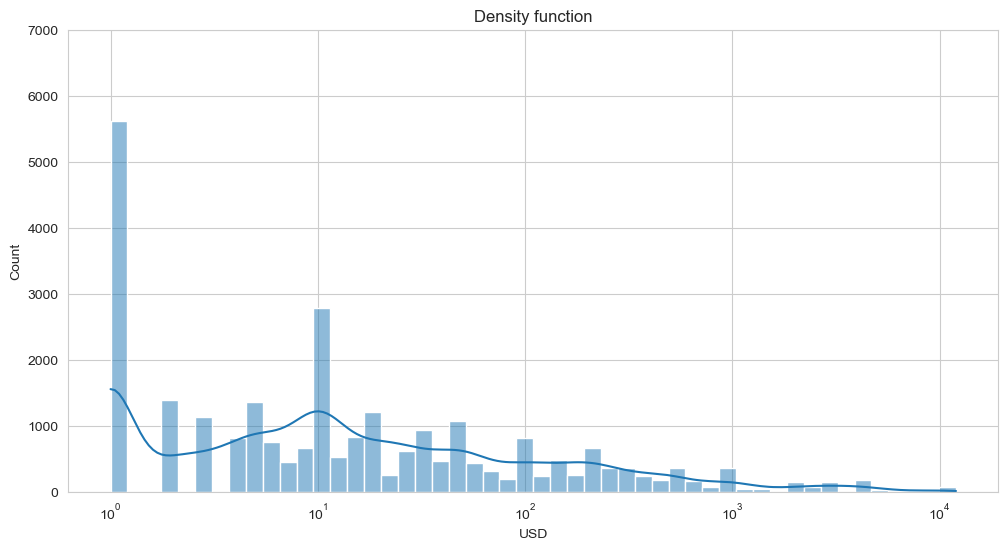

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.gcf()
fig.set_size_inches(12, 6)
sns.set_style("whitegrid")

shit = train[(train["Number_of_Seats__c"] < 100000) & (train["Number_of_Seats__c"] > 0)]["Number_of_Seats__c"] 
ax = sns.histplot(np.array(shit.dropna()),
                  kde=True,
                  bins=50,
                  log_scale=True)
ax.set(xlabel="USD", title="Density function")
ax.set_ylim([0, 7000])

In [14]:
train["Number_of_Seats__c"].fillna(1, inplace=True)

## Company_s_CRM_Type__c

In [15]:
train["Company_s_CRM_Type__c"].fillna(train["Company_s_CRM_Type__c"].mode()[0], inplace=True)

## Deal_type__c

In [16]:
train["Deal_type__c"].fillna("xz", inplace=True)

## Source_Type__c

In [17]:
train["Source_Type__c"].fillna(train["Source_Type__c"].mode()[0], inplace=True)

## Original_Lead_Source__c

In [18]:
train["Original_Lead_Source__c"].fillna(train["Original_Lead_Source__c"].mode()[0], inplace=True)

In [19]:
train["TAM__c"].unique()

array(['0051B000009NLbeQAG', '0051300000C41JZAAZ', '0051B00000CsqZ4QAJ',
       nan, '0051B00000Ct0hhQAB', '0051B000009NLbUQAW',
       '0054v00000DCcU5AAL', '0054v00000DBv2hAAD', '0051B000009MC2dQAG',
       '0051300000Bj16dAAB', '0051B00000DL9x1QAD', '0054v00000DBv23AAD',
       '0051B00000DJeb2QAD', '0051B00000DB7VPQA1', '0051B00000DJdfwQAD',
       '0051B000009NLbZQAW', '0054v00000Edbm6AAB', '0054v00000Edor9AAB',
       '0051300000CUGphAAH'], dtype=object)

## TAM__c

In [20]:
def check_categorical_correlation(categorical1,
                                  categorical2,
                                  p=0.05):
    contingency_table = pd.crosstab(categorical1,
                                    categorical2,
                                    dropna=True)
    table = pd.DataFrame(contingency_table)
    
    chi2, p_value, dof, expected = scipy.stats.chi2_contingency(contingency_table)
    
    # Cramer coeff
    return np.sqrt(chi2 / (table.sum().sum() * np.min(table.shape)))

In [21]:
train["TAM__c"].fillna(train["TAM__c"].mode()[0], inplace=True)

## Secondary_CSM__c

In [22]:
train["Secondary_CSM__c"].fillna(train["Secondary_CSM__c"].mode()[0], inplace=True)

## Original_Lead_Source_Details__c

In [23]:
train["Original_Lead_Source_Details__c"].fillna(train["Original_Lead_Source_Details__c"].mode()[0], inplace=True)

# Id

In [24]:
ids = ["OpportunityId", "CreatedById","AccountId",
       "RecordTypeId","CampaignId",
       "OwnerId", "ContactId",
       "TAM__c", "Secondary_CSM__c"]

In [25]:
def encode_ids(drop_ids, data):
    for i in drop_ids:
        frequency = (data.groupby(i).size() / len(data[i]))
        data[f"{i}Frequency"] = data[i].apply(lambda row: frequency[row])

        means = data.groupby(i)['Probability'].mean()

        data[f"{i}MeanTarget"] = data[i].map(means)
    return data

In [26]:
train = encode_ids(ids, train)
ids.remove("OpportunityId")
ids.append("StageName")
train.drop(ids, axis=1, inplace=True)

## Onehot encoding

In [27]:
list(train.select_dtypes(include=['object']).columns)

['OpportunityId',
 'Type',
 'LeadSource',
 'Company_s_CRM_Type__c',
 'Deal_type__c',
 'Source_Type__c',
 'Original_Lead_Source__c',
 'Original_Lead_Source_Details__c']

In [28]:
onehot_columns = ["Type", "LeadSource", "Company_s_CRM_Type__c",
                  "Deal_type__c", "Source_Type__c", 
                  "Original_Lead_Source__c", "Original_Lead_Source_Details__c"]

In [29]:
train = pd.concat([pd.get_dummies(train[onehot_columns]), train], axis=1)
train.drop(onehot_columns, axis=1, inplace=True)

## Padding

In [30]:
max_len = 100

In [31]:
#dataframe must be sorted!
def padding(data, max_len, filler=None):
    matrix = []
    for i in data["OpportunityId"].unique():
        data_slice = data[data['OpportunityId'] == i].drop(['OpportunityId'], axis=1)
        data_slice = np.array(data_slice)
        if filler:
            fill_value = filler
        else:
            fill_value = data_slice[-1, :]
        pad = np.zeros(shape=(max_len - data_slice.shape[0], data_slice.shape[1])) + fill_value
        padded = np.vstack((data_slice, pad))
        matrix.append(padded)
    return np.array(matrix)

In [32]:
train = train.sort_values("CreatedDateForInsert")

In [33]:
%%time
matrix = padding(train, max_len, filler=-1)

Wall time: 21.2 s


In [88]:
train['Probability'].unique()

array([ 10,  20,  60,  75,  50,  70, 100,  30,   0,   1,  80,  90,  99,
         5,  40,  25,  15,  76,  95], dtype=int64)

## LSTM

In [34]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [47]:
#create a Dataset class
class SequenceDataset(Dataset):
    def __init__(self, data):
        self.data = torch.Tensor(data)
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index: int):
        return self.data[index]
    

class LSTMModel(nn.Module):
    def __init__(self,
                 dataset,
                 input_size: int=137,
                 hidden_size: int=256,
                 seq_len: int=100,
                 num_rnn_layers: int=2
                ):
        super().__init__()
        
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_rnn_layers = num_rnn_layers
        self.seq_len = seq_len
        
        #self.batch_norm_layer = nn.BatchNorm1d(num_features=self.seq_len)
        self.dropout_layer = nn.Dropout(p=0.2)
        self.lstm_layer = nn.LSTM(input_size=self.input_size,
                                    hidden_size=self.hidden_size,
                                    num_layers=self.num_rnn_layers,
                                    batch_first=True, dropout=0.2)
        self.lin_layer = nn.Linear(in_features=self.hidden_size,
                                               out_features=1)
        
    def forward(self, x: torch.Tensor, prev_state: tuple):
        #normalized_1 = self.batch_norm_layer(x)
        lstm_output, new_state = self.lstm_layer(x, prev_state)
        #normalized_2 = self.batch_norm_layer(lstm_output)
        dropped = self.dropout_layer(lstm_output)
        predict = self.lin_layer(dropped)
        return predict, new_state
    
    def initial_state(self, batch_size: int):
        return (torch.zeros(self.num_rnn_layers, batch_size, self.hidden_size),
                torch.zeros(self.num_rnn_layers, batch_size, self.hidden_size))
    
    
class GRUModel(nn.Module):
    def __init__(self,
                 dataset,
                 input_size: int=137,
                 hidden_size: int=256,
                 num_rnn_layers: int=2,
                 seq_len: int=100
                ):
        super().__init__()
        
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_rnn_layers = num_rnn_layers
        self.seq_len = seq_len
        
        self.batch_norm_layer = nn.BatchNorm1d(num_features=seq_len)
        self.dropout_layer = nn.Dropout(p=0.2)
        self.gru_layer = nn.GRU(input_size=self.input_size,
                                    hidden_size=self.hidden_size,
                                    num_layers=self.num_rnn_layers,
                                    batch_first=True, dropout=0.2)
        self.lin_layer = nn.Linear(in_features=self.hidden_size,
                                               out_features=1)
        
    def forward(self, x: torch.Tensor, prev_state: tuple):
        normalized_1 = self.batch_norm_layer(x)
        lstm_output, new_state = self.gru_layer(normalized_1, prev_state)
        normalized_2 = self.batch_norm_layer(lstm_output)
        dropped = self.dropout_layer(normalized_2)
        predict = self.lin_layer(dropped)
        return predict, new_state
    
    def initial_state(self, batch_size: int):
        return torch.zeros(self.num_rnn_layers, batch_size, self.hidden_size)
    

In [48]:
def train_model_lstm(dataset, model, epochs=3, batch_size=38):
    model.train()
    
    history_loss = [] #to track the loss
    history_loss_mean = [] #to track mean loss
    
    dataloader = DataLoader(dataset, batch_size=batch_size, drop_last=True)
    criterion = nn.MSELoss()
    opt = torch.optim.Adam(model.parameters(), lr=0.005)
    
    hid_state, cell_state = model.initial_state(batch_size=batch_size) #initial state of LSTM network 
    
    for epoch in range(epochs):
        for batch_n, batch in enumerate(dataloader):
            clear_output(True)
            model_output = model(batch, (hid_state, cell_state))
            predict_probas = model_output[0][:, :-1].view(-1, model.seq_len-1) #predicted probas for every sequence
            actual_probas = batch[:, 1:, 72] #actual probas for every sequence
            
            loss = criterion(predict_probas, actual_probas)
            rmse = np.sqrt(loss.item())
            
            loss.backward()
            opt.step()
            opt.zero_grad()
            
            #track the loss
            history_loss.append(loss.data.numpy())
            mean_loss = np.mean(history_loss)
            history_loss_mean.append(mean_loss)
            plt.plot(history_loss)
            plt.plot(history_loss_mean)
            plt.show()
            print(f'loss: {round(loss.item(), 3)}, mean loss: {round(float(mean_loss), 3)}, rmse: {round(rmse, 3)}, epoch: {epoch}, batch: {batch_n}')
    print('Done!')

    
def train_model_gru(dataset, model, epochs=3, batch_size=38):
    model.train()
    
    history_loss = [] #to track the loss
    history_loss_mean = [] #to track mean loss
    
    dataloader = DataLoader(dataset, batch_size=batch_size, drop_last=True)
    criterion = nn.MSELoss()
    opt = torch.optim.Adam(model.parameters(), lr=0.005)
    
    hid_state = model.initial_state(batch_size=batch_size) #initial state of LSTM network 
    
    for epoch in range(epochs):
        for batch_n, batch in enumerate(dataloader):
            clear_output(True)
            model_output = model(batch, hid_state)
            predict_probas = model_output[0][:, :-1].view(-1, 99) #predicted probas for every sequence
            actual_probas = batch[:, 1:, 72] #actual probas for every sequence
            
            loss = criterion(predict_probas, actual_probas)
            rmse = np.sqrt(loss.item())
            
            loss.backward()
            opt.step()
            opt.zero_grad()
            
            #track the loss
            history_loss.append(loss.data.numpy())
            mean_loss = np.mean(history_loss)
            history_loss_mean.append(mean_loss)
            plt.plot(history_loss)
            plt.plot(history_loss_mean)
            plt.show()
            print(f'loss: {round(loss.item(), 3)}, mean loss: {round(float(mean_loss), 3)}, rmse: {round(rmse, 3)}, epoch: {epoch}, batch: {batch_n}')
    print('Done!')

In [49]:
%%time
dataset = SequenceDataset(matrix)
model_lstm = LSTMModel(dataset=dataset)
train_model_lstm(dataset, model_lstm)

KeyboardInterrupt: 

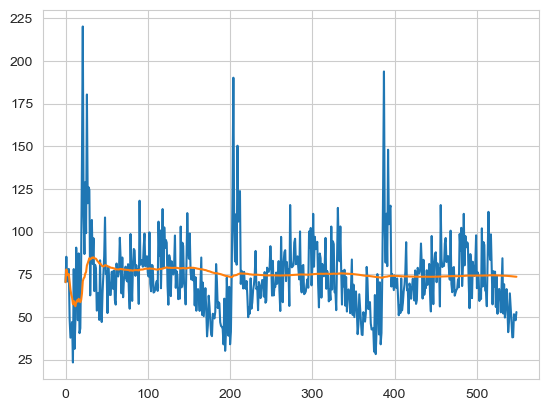

loss: 52.841, mean loss: 73.535, rmse: 7.269, epoch: 2, batch: 182
Done!
Wall time: 6min 37s


In [38]:
%%time
model_gru = GRUModel(dataset=dataset)
train_model_gru(dataset, model_gru)

In [67]:
class LSTMModelClassifier(nn.Module):
    def __init__(self,
                 dataset,
                 input_size: int=137,
                 hidden_size: int=256,
                 num_tokens: int=19,
                 num_rnn_layers: int=2
                ):
        super().__init__()
        
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_rnn_layers = num_rnn_layers
        self.num_tokens = num_tokens
        
        #self.batch_norm_layer = nn.BatchNorm1d(num_features=self.seq_len)
        self.dropout_layer = nn.Dropout(p=0.2)
        self.lstm_layer = nn.LSTM(input_size=self.input_size,
                                    hidden_size=self.hidden_size,
                                    num_layers=self.num_rnn_layers,
                                    batch_first=True, dropout=0.2)
        self.lin_layer = nn.Linear(in_features=self.hidden_size,
                                               out_features=19)
        
    def forward(self, x: torch.Tensor, prev_state: tuple):
        #normalized_1 = self.batch_norm_layer(x)
        lstm_output, new_state = self.lstm_layer(x, prev_state)
        #normalized_2 = self.batch_norm_layer(lstm_output)
        dropped = self.dropout_layer(lstm_output)
        predict = self.lin_layer(dropped)
        return predict, new_state
    
    def initial_state(self, batch_size: int):
        return (torch.zeros(self.num_rnn_layers, batch_size, self.hidden_size),
                torch.zeros(self.num_rnn_layers, batch_size, self.hidden_size))

In [68]:
def train_model_lstm_classifier(dataset, model, epochs=3, batch_size=38):
    model.train()
    
    history_loss = [] #to track the loss
    history_loss_mean = [] #to track mean loss
    
    dataloader = DataLoader(dataset, batch_size=batch_size, drop_last=True)
    criterion = nn.CrossEntropyLoss()
    opt = torch.optim.Adam(model.parameters(), lr=0.005)
    
    hid_state, cell_state = model.initial_state(batch_size=batch_size) #initial state of LSTM network 
    
    for epoch in range(epochs):
        for batch_n, batch in enumerate(dataloader):
            clear_output(True)
            model_output = model(batch, (hid_state, cell_state))
            predict_probas = model_output[0][:, :-1].view(-1, model.num_tokens) #predicted probas for every sequence
            actual_probas = batch[:, 1:, 72] #actual probas for every sequence
            
            loss = criterion(predict_probas, actual_probas)
            
            loss.backward()
            opt.step()
            opt.zero_grad()
            
            #track the loss
            history_loss.append(loss.data.numpy())
            mean_loss = np.mean(history_loss)
            history_loss_mean.append(mean_loss)
            plt.plot(history_loss)
            plt.plot(history_loss_mean)
            plt.show()
            print(f'loss: {round(loss.item(), 3)}, mean loss: {round(float(mean_loss), 3)}, epoch: {epoch}, batch: {batch_n}')
    print('Done!')


In [73]:
slicee = dataset[:32]
slicee.shape

torch.Size([32, 100, 137])

In [74]:
output = model_lstm_classifier(slicee, prev_state=model_lstm_classifier.initial_state(batch_size=32))[0]

In [87]:
output[0]

tensor([[ 0.0341,  0.0661, -0.0323,  ..., -0.0588,  0.0390,  0.0764],
        [ 0.0838,  0.0466, -0.0777,  ..., -0.0434,  0.0055,  0.0485],
        [ 0.0766,  0.0331, -0.0607,  ..., -0.1045,  0.0314,  0.0586],
        ...,
        [ 0.0427,  0.1118,  0.0713,  ..., -0.0363, -0.0683,  0.1007],
        [ 0.0360,  0.0831,  0.0661,  ..., -0.0195, -0.0902,  0.1002],
        [ 0.0318,  0.0906,  0.0960,  ..., -0.0055, -0.0787,  0.0933]],
       grad_fn=<SelectBackward0>)

In [85]:
output[:, :-1]

torch.Size([32, 99, 19])

In [72]:
model_lstm_classifier = LSTMModelClassifier(dataset)
train_model_lstm_classifier(dataset, model_lstm_classifier)

RuntimeError: view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.